In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

# Analyze class balance

0    1225312
1    80810  
Name: target, dtype: int64
0    0.93813
1    0.06187
Name: target, dtype: float64


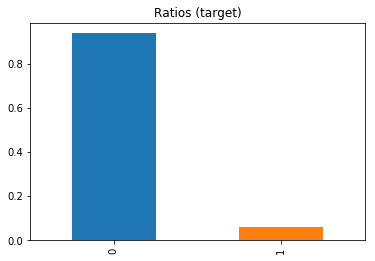

In [287]:
import matplotlib.pyplot as plt
import numpy as np

target_counts = train_df.target.value_counts(normalize=False)
print(target_counts)

target_ratios = train_df.target.value_counts(normalize=True)
print(target_ratios)

target_ratios.plot(kind='bar', title='Ratios (target)')
plt.show()

# Analyze text features

In [319]:
#Column for question character length
train_df['text_char_len']  = train_df['question_text'].apply(len)
test_df['text_char_len']  = test_df['question_text'].apply(len)

In [320]:
#Column for ratio of upper case characters
train_df['upper_char_ratio']  = train_df['question_text'].str.count('[A-Z]') / train_df['text_char_len']
test_df['upper_char_ratio']  = test_df['question_text'].str.count('[A-Z]') / test_df['text_char_len']

In [321]:
#Column for question word count
train_df['text_word_cnt']  = train_df['question_text'].str.split().apply(len)
test_df['text_word_cnt']  = test_df['question_text'].str.split().apply(len)

In [322]:
#Column for ratio of upper case words
train_df['upper_word_ratio']  = train_df['question_text'].str.split().apply(lambda a: map(str.isupper, a)).apply(sum) / train_df['text_word_cnt']
test_df['upper_word_ratio']  = test_df['question_text'].str.split().apply(lambda a: map(str.isupper, a)).apply(sum) / test_df['text_word_cnt']

In [323]:
#Column for question mark count
train_df['q_mark_count'] = train_df['question_text'].str.count('[?]')
test_df['q_mark_count'] = test_df['question_text'].str.count('[?]')

In [324]:
#Column for ends with question mark
train_df['ends_with_q'] = train_df['question_text'].str.endswith('?', False)
test_df['ends_with_q'] = test_df['question_text'].str.endswith('?', False)

In [325]:
#Column for question mark count
train_df['exc_mark_count'] = train_df['question_text'].str.count('[!]')
test_df['exc_mark_count'] = test_df['question_text'].str.count('[!]')

In [326]:
#Column for inappropriate word count
train_df['inappropriate_word_count'] = train_df['question_text'].str.count(' fuck | shit | ass | dick | pussy | asshole | cunt | cock | blowjob | slut | nigger | nigga | goddamn | twat | assbrain | arse | fag ')
test_df['inappropriate_word_count'] = test_df['question_text'].str.count(' fuck | shit | ass | dick | pussy | asshole | cunt | cock | blowjob | slut | nigger | nigga | goddamn | twat | assbrain | arse | fag ')

In [221]:
train_df[train_df['inappropriate_word_count'] > 1].sample(10)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
592811,741cd45c315889175e23,Is Malcolm Merlyn the biggest douchebag and asshole in the Arrowverse? He is mostly a dick to everyone.,0,103,0.048544,18,0.000000,1,False,0,2
136888,1acb15d3ed129eb461f0,? Why does trump look like he has a dick up his ass all the time?,1,65,0.015385,16,0.000000,2,True,0,2
877079,abd69c2c84e564aa4454,"A lot of guys touch my ass and send me dick pics, what do I say or do about this?",0,81,0.024691,20,0.100000,1,True,0,2
569241,6f8b2b507a3a5c72fb9f,How big would my cock have to be to go in someones ass and out their mouth?,0,75,0.013333,17,0.000000,1,True,0,2
232610,2d7e7a27713c8b5004c5,If Jesus was real why didn't fuck my asshole yet?,1,49,0.040816,10,0.000000,1,True,0,2
766777,9638da97762b24118928,Why is it cow dung and bull shit but not cow shit and bull dung?,0,64,0.015625,15,0.000000,1,True,0,2
165104,2044a8f548d6458ae2d1,Is it possible to accidentally fuck a pig and then that pig shit my cum inside a females vagina and her get pregnant?,1,117,0.008547,23,0.000000,1,True,0,2
73825,0e76a2d0151807274034,Do you have a big ass? Do you secretly like it when men stick their dick on your ass crack in crowded buses and trains?,1,119,0.016807,25,0.000000,2,True,0,2
581988,72098b14060a10ef613f,Is it safe liking pussy and how the women feel when her pussy Bing liked?,0,73,0.027397,15,0.000000,1,True,0,2
212083,29798d727759362df79a,"What the fuck bitch what the FUCK, this is so stupid Im 15 and I know all the real and the reasonable answers, this site is a joke honestly, go learn physics for fuck sake?",1,172,0.040698,35,0.057143,1,True,0,2


In [222]:
train_df[train_df['exc_mark_count'] > 1].sample(10)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
1200022,eb31fcad50b3defe5925,"Where was the photograph taken on the cover of Panic! At the Disco's album ""Too Weird to Live, Too Rare to Die!""?",0,113,0.088496,22,0.000000,1,True,2,0
1155477,e269887c2f898b20fec7,What should he do? When a girl really loves a gay guy! And that guy is single!,0,78,0.038462,17,0.000000,1,False,2,0
80793,0fd3e75aac3826159865,"My partner of six years is a narcissist in every way! How do I leave? He's socially isolated me, I have no friends and my family and I don't speak! I need to get out!",0,166,0.042169,35,0.114286,1,False,3,0
353233,453b489ba46b0801b7ba,"You have been found guilty of breathing, you will be executed. You have a choice between death by PASTA! Or death by SQUIRREL! What do you decide?",1,146,0.116438,27,0.074074,1,True,2,0
33601,069469a0049f0c284f42,Why do fast food employees almost never check that the order is right? My order is wrong about 30% of the freaking time! How hard is it!?,1,137,0.021898,27,0.000000,2,True,2,0
835953,a3d090b40fb6c2862966,"What does it mean when a niqabi says,""Give me all your money! NOW!""?",1,68,0.073529,13,0.076923,1,True,2,0
1179291,e716c4c17b03117c1964,How? Why? Insomnia! Help!,0,25,0.160000,4,0.000000,2,False,2,0
1297765,fe5a0325a37f429d0836,How can we calculate 97! (or any great number with !) without using calculator?,0,79,0.012658,14,0.000000,1,True,2,0
89173,1178eee0efb49c72b833,What is the result of [math]\sum_{i = 1}^{\infty}\sum_{j = 1}^{\infty}\frac{(i-1)!(j-1)!}{(i+j)!}{a^{i+j}}[/math]?,0,114,0.008772,10,0.000000,1,True,3,0
679629,851b1af75cce03b2867c,"Fuck you kora always telling me to revise my shit, you suck!!! reddit is so much better?",1,88,0.011364,17,0.000000,1,True,3,0


In [223]:
train_df[train_df['ends_with_q'] == False].sample(10)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
581817,7200f211769023f90f90,Where can I find black people? I need black people…,0,51,0.058824,10,0.200000,1,False,0,0
879358,ac48f6f84f76419607a2,Why is Donald Trump getting so much heat? I voted for him hoping for change like he promised and his strong business background. Also his wealth since he can’t be bought by lobbyists.,0,183,0.027322,33,0.030303,1,False,0,0
374770,49783384fb3b0cd244fe,"As a Muslim, have you visited a church? Describe your experience.",0,65,0.046154,11,0.000000,1,False,0,0
311842,3d17204ae7cadb89a5cc,Is 'being' a gerund acting as an object in my sentence? I enjoy being with you.,0,79,0.025316,16,0.062500,1,False,0,0
1099828,d78a9c74fcb67b3d0b34,"Are there any good sources typologies of jobs in the economy? E.g analysts, executives, Programmers..",0,101,0.029703,15,0.000000,1,False,0,0
507363,6358c38807b9759927c0,Remove this question I'm a troll,1,32,0.062500,6,0.000000,0,False,0,0
749845,92e5b07e09e0a7d71574,"Do plants need direct sunlight? I mean, if the sky was permanently clouded, would the dim light be enough for the plants? Would they be able to perform photosynthesis",0,166,0.018072,29,0.034483,2,False,0,0
443462,56e65f945ae16aa8c11b,Are some people immune to nose bleeds? I've never had a nose bleed even when I was hit in the nose really hard.,0,111,0.027027,23,0.043478,1,False,0,0
1231066,f1408083779876b92c11,"Am I transphobic? My girlfriend is transitioning, so I broke up with her because I'm not attracted to men.",0,106,0.047170,19,0.105263,1,False,0,0
1096677,d6f065307791420fae78,How does it feel to ride the AC local train recently introduced in India? Feel free to post exterior and interior videos of the said locomotive!,0,144,0.034722,26,0.038462,1,False,1,0


# Analyze question character lengths

In [224]:
print('Question character length analysis')
print('----------------------------------')


Question character length analysis
----------------------------------


In [225]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['text_char_len'].min()))
print('max: {0:.2f}'.format(test_df['text_char_len'].max()))
print('mean: {0:.2f}'.format(test_df['text_char_len'].mean()))
print('std: {0:.2f}'.format(test_df['text_char_len'].std()))

dataset: Test
min: 11.00
max: 588.00
mean: 70.46
std: 38.73


In [226]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['text_char_len'].min()))
print('max: {0:.2f}'.format(train_df['text_char_len'].max()))
print('mean: {0:.2f}'.format(train_df['text_char_len'].mean()))
print('std: {0:.2f}'.format(train_df['text_char_len'].std()))

dataset: Train
min: 1.00
max: 1017.00
mean: 70.68
std: 38.78


In [227]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_char_len'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_char_len'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_char_len'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_char_len'].std()))

dataset: Train (sincere)
min: 5.00
max: 752.00
mean: 68.87
std: 36.74


In [228]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_char_len'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_char_len'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_char_len'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_char_len'].std()))

dataset: Train (insincere)
min: 1.00
max: 1017.00
mean: 98.06
std: 55.19


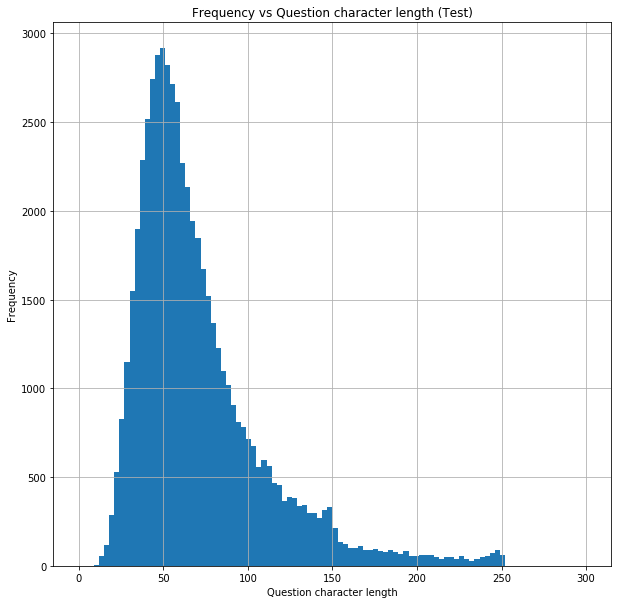

In [229]:
ax = test_df['text_char_len'].hist(figsize=(10, 10), bins=100, range=(0, 300))
ax.set_title('Frequency vs Question character length (Test)')
ax.set_xlabel('Question character length')
ax.set_ylabel('Frequency')
plt.show()

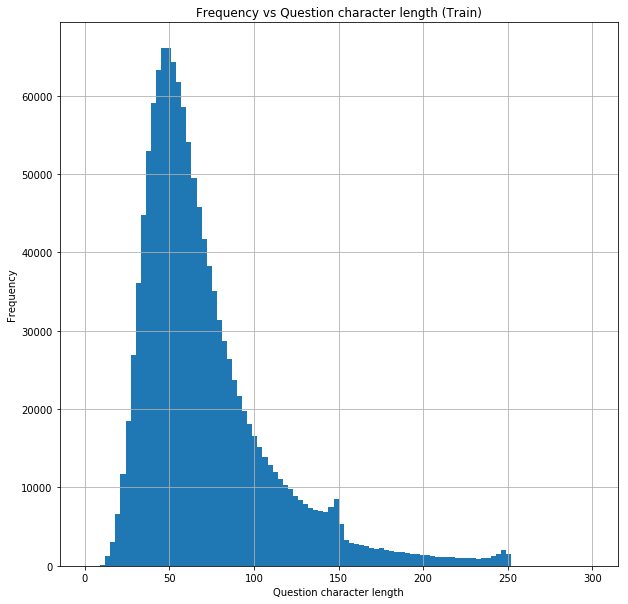

In [230]:
import matplotlib.pyplot as plt

ax = train_df['text_char_len'].hist(figsize=(10, 10), bins=100, range=(0, 300))
ax.set_title('Frequency vs Question character length (Train)')
ax.set_xlabel('Question character length')
ax.set_ylabel('Frequency')
plt.show()

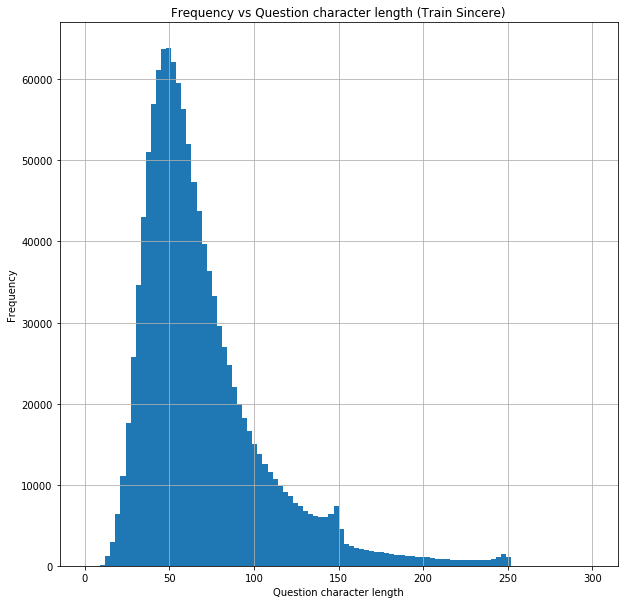

In [231]:
ax = train_df[train_df['target'] == 0]['text_char_len'].hist(figsize=(10, 10), bins=100, range=(0, 300))
ax.set_title('Frequency vs Question character length (Train Sincere)')
ax.set_xlabel('Question character length')
ax.set_ylabel('Frequency')
plt.show()

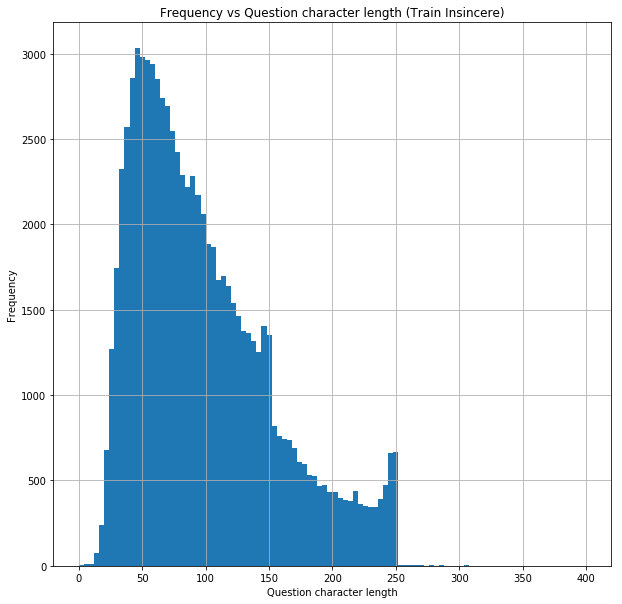

In [232]:
ax = train_df[train_df['target'] == 1]['text_char_len'].hist(figsize=(10, 10), bins=100, range=(0, 400))
ax.set_title('Frequency vs Question character length (Train Insincere)')
ax.set_xlabel('Question character length')
ax.set_ylabel('Frequency')
plt.show()

# Analyze ratio of uppercase characters

In [233]:
print('Uppercase character ratio analysis')
print('----------------------------------')


Uppercase character ratio analysis
----------------------------------


In [234]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['upper_char_ratio'].min()))
print('max: {0:.2f}'.format(test_df['upper_char_ratio'].max()))
print('mean: {0:.2f}'.format(test_df['upper_char_ratio'].mean()))
print('std: {0:.2f}'.format(test_df['upper_char_ratio'].std()))

dataset: Test
min: 0.00
max: 0.78
mean: 0.05
std: 0.04


In [235]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['upper_char_ratio'].min()))
print('max: {0:.2f}'.format(train_df['upper_char_ratio'].max()))
print('mean: {0:.2f}'.format(train_df['upper_char_ratio'].mean()))
print('std: {0:.2f}'.format(train_df['upper_char_ratio'].std()))

dataset: Train
min: 0.00
max: 1.00
mean: 0.05
std: 0.04


In [236]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_char_ratio'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_char_ratio'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_char_ratio'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_char_ratio'].std()))

dataset: Train (sincere)
min: 0.00
max: 0.90
mean: 0.05
std: 0.04


In [237]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_char_ratio'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_char_ratio'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_char_ratio'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_char_ratio'].std()))

dataset: Train (insincere)
min: 0.00
max: 1.00
mean: 0.04
std: 0.04


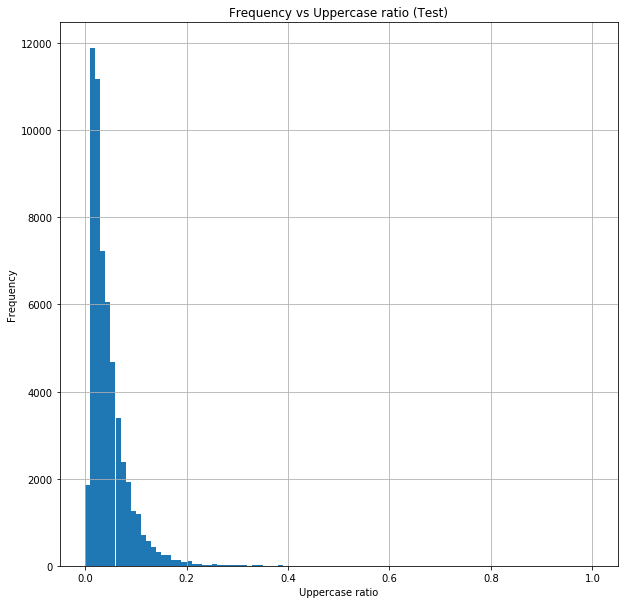

In [238]:
ax = test_df['upper_char_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase ratio (Test)')
ax.set_xlabel('Uppercase ratio')
ax.set_ylabel('Frequency')
plt.show()

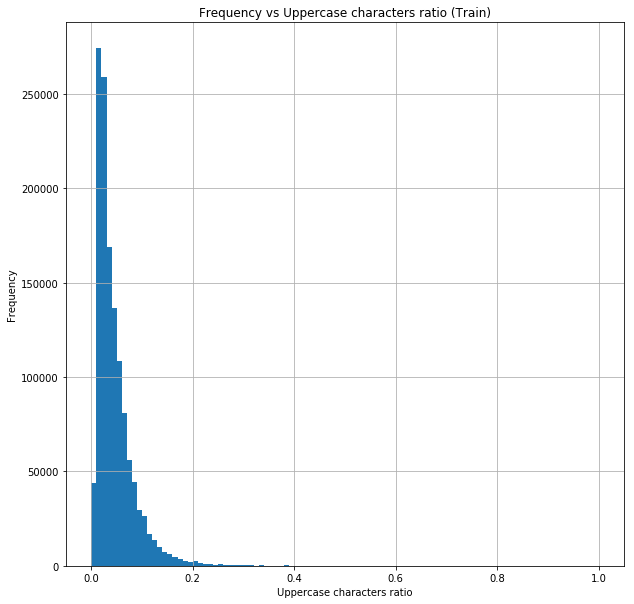

In [239]:
import matplotlib.pyplot as plt

ax = train_df['upper_char_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase characters ratio (Train)')
ax.set_xlabel('Uppercase characters ratio')
ax.set_ylabel('Frequency')
plt.show()

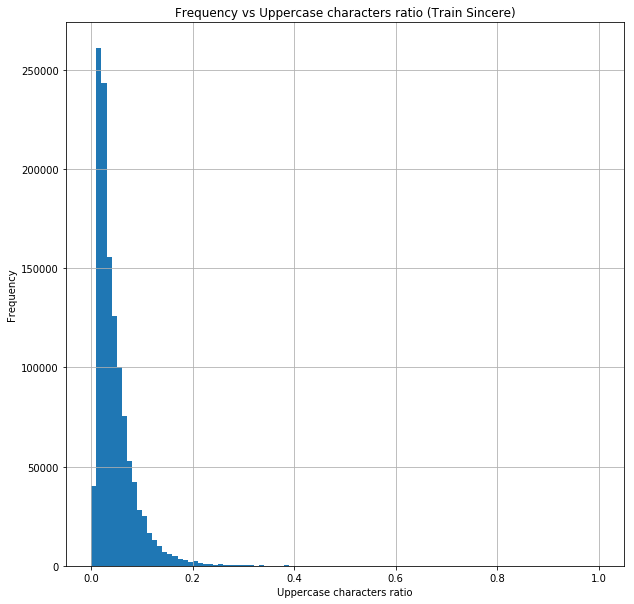

In [240]:
ax = train_df[train_df['target'] == 0]['upper_char_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase characters ratio (Train Sincere)')
ax.set_xlabel('Uppercase characters ratio')
ax.set_ylabel('Frequency')
plt.show()

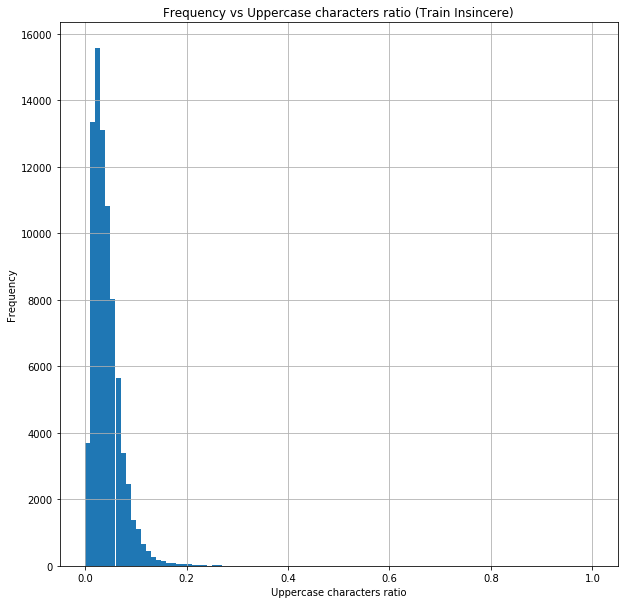

In [241]:
ax = train_df[train_df['target'] == 1]['upper_char_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase characters ratio (Train Insincere)')
ax.set_xlabel('Uppercase characters ratio')
ax.set_ylabel('Frequency')
plt.show()

In [242]:
train_df[train_df['upper_char_ratio'] > 0.7].sample(20)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
729855,8eeac897c5d2fbab2815,What IS the MOST ACCURATE LOCATION for HORSE SHOES INVOLVING EARLY TABACCO AND DOBERMAN PINCHERS?,1,97,0.752577,15,0.800000,1,True,0,0
1029457,c9bac84f50813ed829b1,What IS the RELATION BEETWEEN SUSMA SWAR AND LALIT MODI?,0,56,0.714286,10,0.800000,1,True,0,0
257237,325aed59c920566911bf,"WHY IS ANYTHING DIVIDED BY 0 UNDEFINED BUT IF 0 IS ""NOTHING"" WHY CANT WE KEEP the NUMERATOR AS the ANSWER?",0,106,0.707547,21,0.809524,1,True,0,0
731406,8f3d80e1cd55e46322f5,"MUTUAL FUND CROOKS SAYING ALLTIME BUY, BUY INDIGO, JET, EVEN LEADING CHANNELS were BEHIND AIRLINE STOCKS . FINALLY MF GUYS DRAMA OUT NOW. AFTER JET'S HORRIBLE ANNUAL/QTR REPORT. BE AWARE of THIS TYPE of CROOKS.?",1,211,0.753555,35,0.885714,1,True,0,0
1220689,ef3f205664f26d39d364,How SAMBHAJI MAHARAJ DIED?,0,26,0.769231,4,0.750000,1,True,0,0
448968,57f146c0aabfd2c0b532,IF WHITE PEOPLE MIX WITH OTHER RACES WILL THEY EVER BE WHITE AGAIN. IS THIS GETTING RID OF WHITE PEOPLE?,1,104,0.798077,20,1.000000,1,True,0,0
244850,2fe3bdbe54b652b04e38,"HYPOCRISY, THY NAME IS BJP?",1,27,0.777778,5,1.000000,1,True,0,0
367576,480f9d82fbb9d8390311,How MANY KILOMETERS CAN A TRUCK RUN ON 1 LITER?,0,47,0.723404,10,0.800000,1,True,0,0
414704,5141e935caa008600afe,WHY KANPUR ENGINEERS ARE CARELESS ABOUT GATE ?,1,46,0.826087,8,0.875000,1,True,0,0
785173,99d021db8d1404b830f8,What IS UNFORSEEN CIRCUMSTANCES?,0,32,0.781250,4,0.750000,1,True,0,0


# Analyze question word counts

In [243]:
print('Question word counts analysis')
print('-----------------------------')


Question word counts analysis
-----------------------------


In [244]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['text_word_cnt'].min()))
print('max: {0:.2f}'.format(test_df['text_word_cnt'].max()))
print('mean: {0:.2f}'.format(test_df['text_word_cnt'].mean()))
print('std: {0:.2f}'.format(test_df['text_word_cnt'].std()))

dataset: Test
min: 2.00
max: 87.00
mean: 12.75
std: 7.01


In [245]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['text_word_cnt'].min()))
print('max: {0:.2f}'.format(train_df['text_word_cnt'].max()))
print('mean: {0:.2f}'.format(train_df['text_word_cnt'].mean()))
print('std: {0:.2f}'.format(train_df['text_word_cnt'].std()))

dataset: Train
min: 1.00
max: 134.00
mean: 12.80
std: 7.05


In [246]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_word_cnt'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_word_cnt'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_word_cnt'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['text_word_cnt'].std()))

dataset: Train (sincere)
min: 2.00
max: 134.00
mean: 12.51
std: 6.75


In [247]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_word_cnt'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_word_cnt'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_word_cnt'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['text_word_cnt'].std()))

dataset: Train (insincere)
min: 1.00
max: 64.00
mean: 17.28
std: 9.57


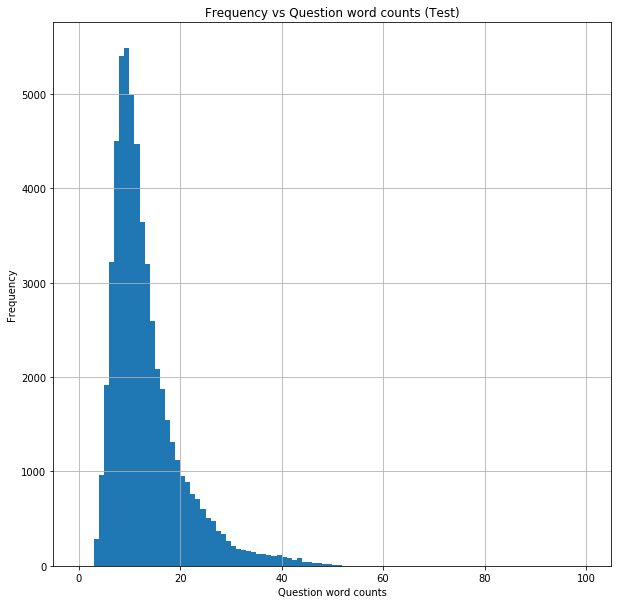

In [248]:
ax = test_df['text_word_cnt'].hist(figsize=(10, 10), bins=100, range=(0, 100))
ax.set_title('Frequency vs Question word counts (Test)')
ax.set_xlabel('Question word counts')
ax.set_ylabel('Frequency')
plt.show()

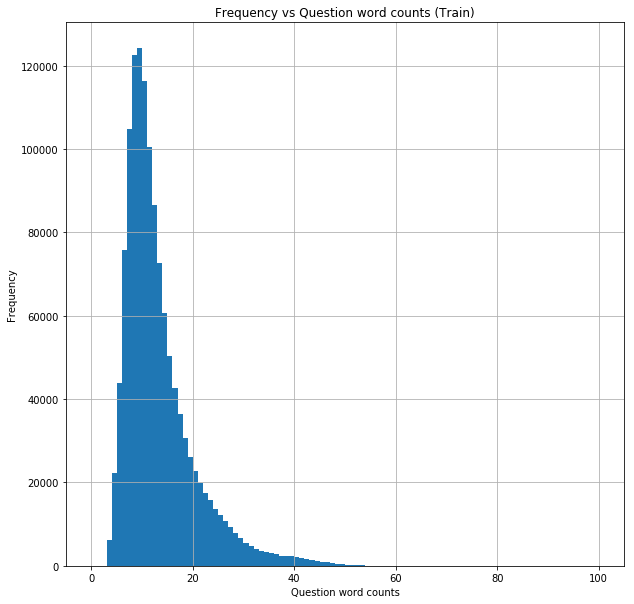

In [249]:
import matplotlib.pyplot as plt

ax = train_df['text_word_cnt'].hist(figsize=(10, 10), bins=100, range=(0, 100))
ax.set_title('Frequency vs Question word counts (Train)')
ax.set_xlabel('Question word counts')
ax.set_ylabel('Frequency')
plt.show()

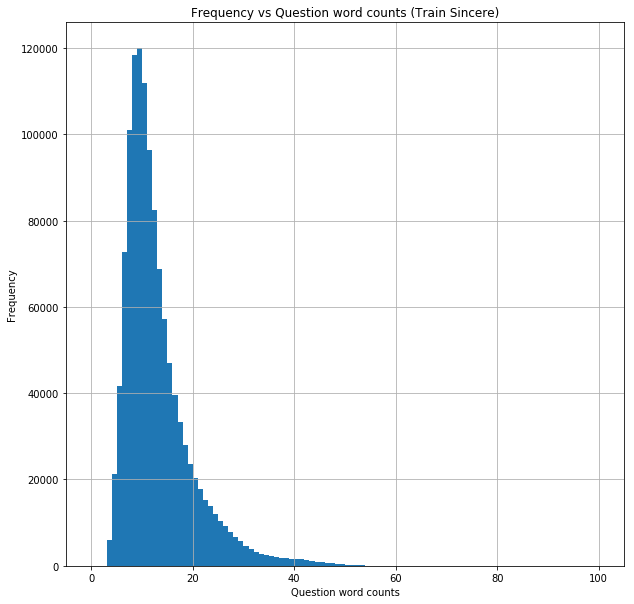

In [250]:
ax = train_df[train_df['target'] == 0]['text_word_cnt'].hist(figsize=(10, 10), bins=100, range=(0, 100))
ax.set_title('Frequency vs Question word counts (Train Sincere)')
ax.set_xlabel('Question word counts')
ax.set_ylabel('Frequency')
plt.show()

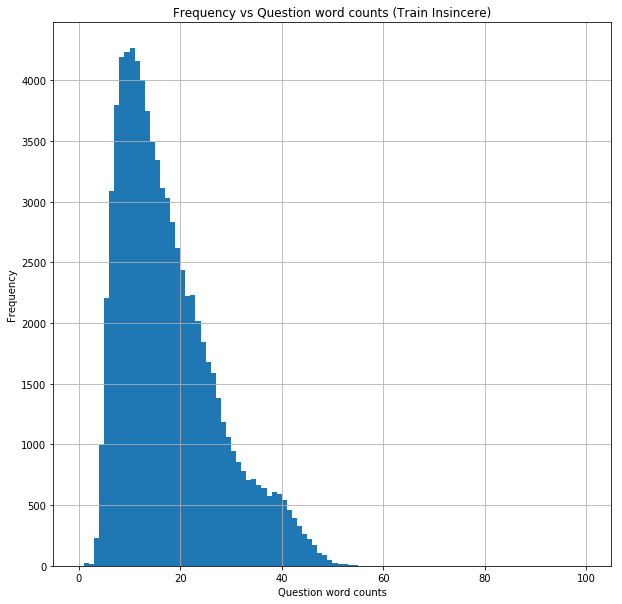

In [251]:
ax = train_df[train_df['target'] == 1]['text_word_cnt'].hist(figsize=(10, 10), bins=100, range=(0, 100))
ax.set_title('Frequency vs Question word counts (Train Insincere)')
ax.set_xlabel('Question word counts')
ax.set_ylabel('Frequency')
plt.show()

In [252]:
train_df[train_df['text_word_cnt'] == 2].sample(10)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
1136052,dea837a2dc9411e0cb61,Which certification?,0,20,0.050000,2,0.0,1,True,0,0
1286137,fc0ec9507f0641f6f51b,Whatis rpm?,0,11,0.090909,2,0.0,1,True,0,0
1032499,ca51ea459313d3d5f931,Kurdistan (Region):,1,20,0.100000,2,0.0,0,False,0,0
317713,3e4404ef5bfe42fb4dcd,Anti-pornography Movement:,1,27,0.074074,2,0.0,0,False,0,0
436657,55921ce6a268c14d365a,Human needs?,0,12,0.083333,2,0.0,1,True,0,0
574901,70a4709deb9d094ad1f2,What's ejection?,0,16,0.062500,2,0.0,1,True,0,0
335096,41aacdce6593283fc741,Whatis diphthong?,0,17,0.058824,2,0.0,1,True,0,0
707269,8a7bef80e498f342282b,Shia Islam:,1,12,0.166667,2,0.0,0,False,0,0
1068048,d149875988d27609e044,Nuclear weapons?,0,16,0.062500,2,0.0,1,True,0,0
151774,1daf2813f7a3069422cc,What isOrganism?,0,16,0.125000,2,0.0,1,True,0,0


# Analyze ratio of uppercase words

In [253]:
print('Uppercase word ratio analysis')
print('-----------------------------')


Uppercase word ratio analysis
-----------------------------


In [254]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['upper_word_ratio'].min()))
print('max: {0:.2f}'.format(test_df['upper_word_ratio'].max()))
print('mean: {0:.2f}'.format(test_df['upper_word_ratio'].mean()))
print('std: {0:.2f}'.format(test_df['upper_word_ratio'].std()))

dataset: Test
min: 0.00
max: 0.94
mean: 0.03
std: 0.06


In [255]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['upper_word_ratio'].min()))
print('max: {0:.2f}'.format(train_df['upper_word_ratio'].max()))
print('mean: {0:.2f}'.format(train_df['upper_word_ratio'].mean()))
print('std: {0:.2f}'.format(train_df['upper_word_ratio'].std()))

dataset: Train
min: 0.00
max: 1.00
mean: 0.03
std: 0.06


In [256]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_word_ratio'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_word_ratio'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_word_ratio'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['upper_word_ratio'].std()))

dataset: Train (sincere)
min: 0.00
max: 1.00
mean: 0.04
std: 0.06


In [257]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_word_ratio'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_word_ratio'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_word_ratio'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['upper_word_ratio'].std()))

dataset: Train (insincere)
min: 0.00
max: 1.00
mean: 0.02
std: 0.05


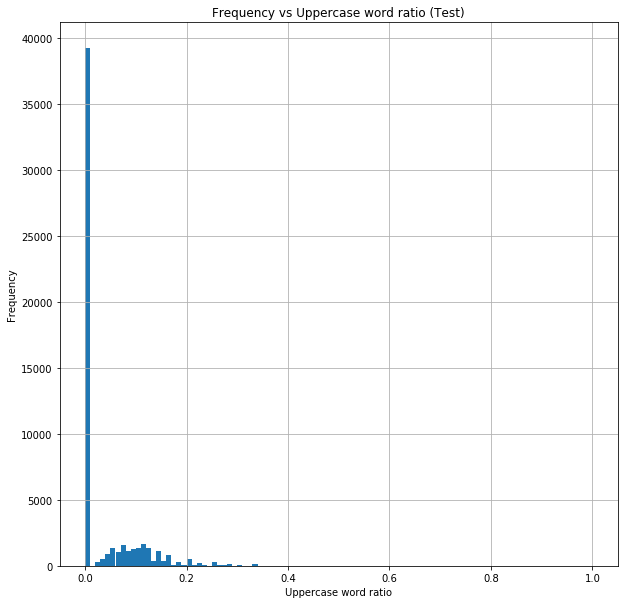

In [258]:
ax = test_df['upper_word_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase word ratio (Test)')
ax.set_xlabel('Uppercase word ratio')
ax.set_ylabel('Frequency')
plt.show()

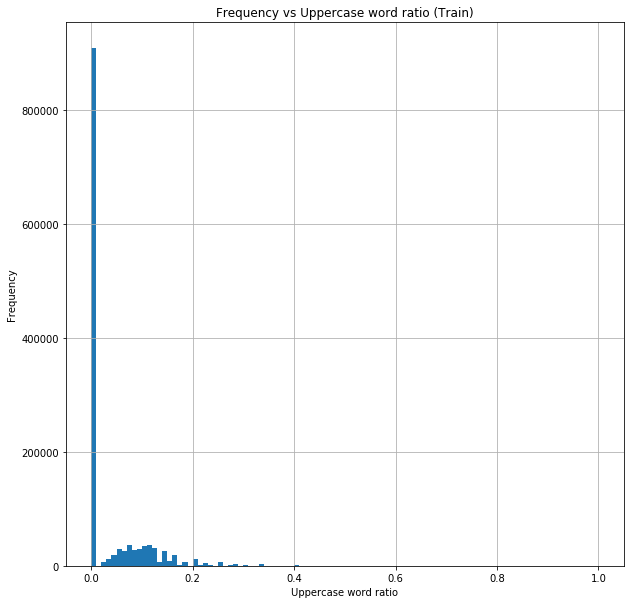

In [259]:
import matplotlib.pyplot as plt

ax = train_df['upper_word_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase word ratio (Train)')
ax.set_xlabel('Uppercase word ratio')
ax.set_ylabel('Frequency')
plt.show()

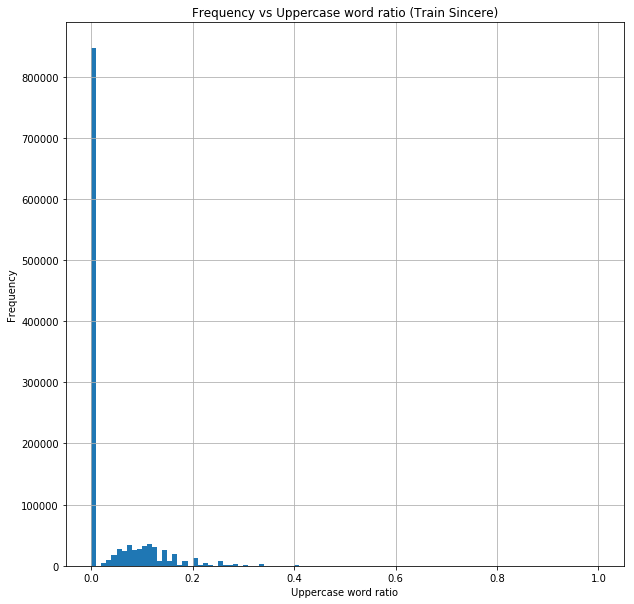

In [260]:
ax = train_df[train_df['target'] == 0]['upper_word_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase word ratio (Train Sincere)')
ax.set_xlabel('Uppercase word ratio')
ax.set_ylabel('Frequency')
plt.show()

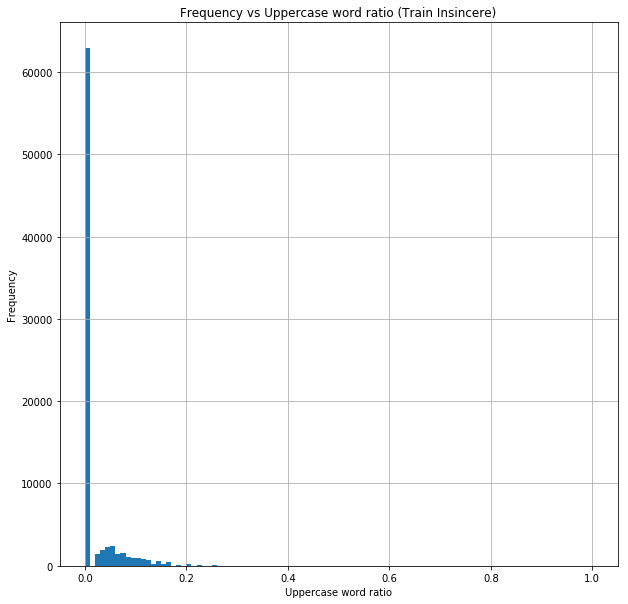

In [261]:
ax = train_df[train_df['target'] == 1]['upper_word_ratio'].hist(figsize=(10, 10), bins=100, range=(0.0, 1.0))
ax.set_title('Frequency vs Uppercase word ratio (Train Insincere)')
ax.set_xlabel('Uppercase word ratio')
ax.set_ylabel('Frequency')
plt.show()

In [262]:
train_df[train_df['upper_word_ratio'] > 0.5].sample(10)

,qid,question_text,target,text_char_len,upper_char_ratio,text_word_cnt,upper_word_ratio,q_mark_count,ends_with_q,exc_mark_count,inappropriate_word_count
122914,180f71c72c1ccb5d3bca,What DOES INST 008196-ANB in IDBI BANK STATEMENT MEAN?,0,54,0.611111,9,0.777778,1,True,0,0
473398,5cb41391a5c70ba0b101,What IS NON technical SSC in DEFENCE?,0,37,0.432432,7,0.571429,1,True,0,0
1301672,ff21273b238f83dc35fd,How do PLANT RESPOND TO STIMULUS?,0,33,0.696970,6,0.666667,1,True,0,0
1129548,dd5f3e11b9ad42560805,SHOULD I TRUST the government?,0,30,0.400000,5,0.600000,1,True,0,0
211164,294b527000bb165da5aa,"What was the previous year’s BHU MBA (R.I, F.T, F.M) CUTT OFF?",0,62,0.322581,12,0.583333,1,True,0,0
1152386,e1cdce665a056855a4c4,"WHY DO LIBERALS WANT MORE AND MORE MONEY FROM US? FROM THE FEDERAL TO STATE TO CITY TO TOWNSHIP, IT GOES UP EVERY YEAR. WHEN IS IT ENOUGH?",1,138,0.775362,28,1.000000,2,True,0,0
149665,1d4446584d4e740ac243,"What is 6PL, 7 PL, 8PL, 9PL and 10PL?",0,37,0.297297,9,0.555556,1,True,0,0
87530,1127984e55eacb90089e,"Which is better, BITS Goa CS, NSIT CS or DTU CS?",0,48,0.395833,11,0.545455,1,True,0,0
146097,1c93294c6bb9debe8802,Is DR RAJKUMAR GRETEST ACTOR in India?,0,38,0.631579,7,0.571429,1,True,0,0
621436,79af51f565880006d22f,How FAST ASTEROID MOVES TOWARD the SUN?,0,39,0.692308,7,0.714286,1,True,0,0


# Analyze punctuation

In [263]:
print('Question mark count analysis')
print('-----------------------------')


Question mark count analysis
-----------------------------


In [264]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['q_mark_count'].min()))
print('max: {0:.2f}'.format(test_df['q_mark_count'].max()))
print('mean: {0:.2f}'.format(test_df['q_mark_count'].mean()))
print('std: {0:.2f}'.format(test_df['q_mark_count'].std()))

dataset: Test
min: 0.00
max: 5.00
mean: 1.06
std: 0.26


In [265]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['q_mark_count'].min()))
print('max: {0:.2f}'.format(train_df['q_mark_count'].max()))
print('mean: {0:.2f}'.format(train_df['q_mark_count'].mean()))
print('std: {0:.2f}'.format(train_df['q_mark_count'].std()))

dataset: Train
min: 0.00
max: 10.00
mean: 1.06
std: 0.26


In [266]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['q_mark_count'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['q_mark_count'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['q_mark_count'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['q_mark_count'].std()))

dataset: Train (sincere)
min: 0.00
max: 10.00
mean: 1.05
std: 0.25


In [267]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['q_mark_count'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['q_mark_count'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['q_mark_count'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['q_mark_count'].std()))

dataset: Train (insincere)
min: 0.00
max: 8.00
mean: 1.13
std: 0.39


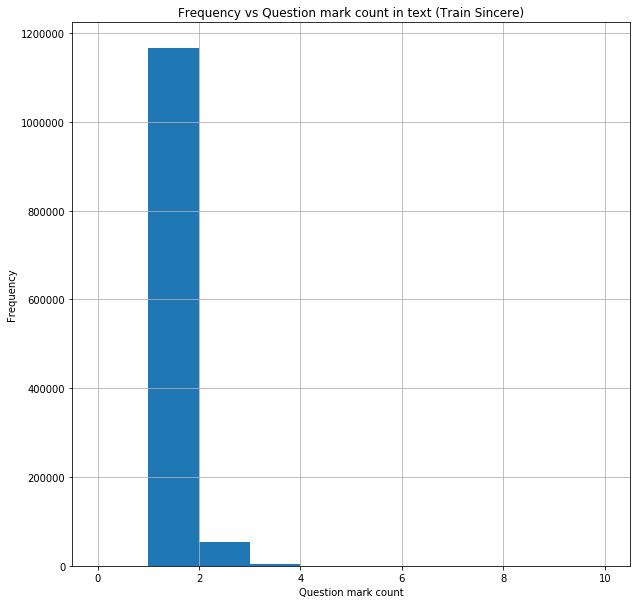

In [333]:
ax = train_df[train_df['target'] == 0]['q_mark_count'].hist(figsize=(10, 10), bins=10, range=(0.0, 10))
ax.set_title('Frequency vs Question mark count in text (Train Sincere)')
ax.set_xlabel('Question mark count')
ax.set_ylabel('Frequency')
plt.show()

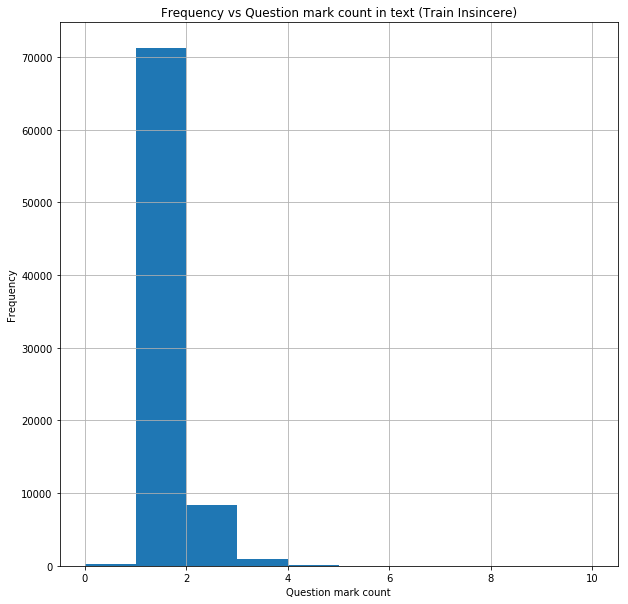

In [337]:
ax = train_df[train_df['target'] == 1]['q_mark_count'].hist(figsize=(10, 10), bins=10, range=(0.0, 10))
ax.set_title('Frequency vs Question mark count in text (Train Insincere)')
ax.set_xlabel('Question mark count')
ax.set_ylabel('Frequency')
plt.show()

In [268]:
print('Ends with a question mark analysis')
print('----------------------------------')


Ends with a question mark analysis
----------------------------------


In [269]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['ends_with_q'].min()))
print('max: {0:.2f}'.format(test_df['ends_with_q'].max()))
print('mean: {0:.2f}'.format(test_df['ends_with_q'].mean()))
print('std: {0:.2f}'.format(test_df['ends_with_q'].std()))

dataset: Test
min: 0.00
max: 1.00
mean: 0.98
std: 0.15


In [270]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['ends_with_q'].min()))
print('max: {0:.2f}'.format(train_df['ends_with_q'].max()))
print('mean: {0:.2f}'.format(train_df['ends_with_q'].mean()))
print('std: {0:.2f}'.format(train_df['ends_with_q'].std()))

dataset: Train
min: 0.00
max: 1.00
mean: 0.98
std: 0.15


In [271]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['ends_with_q'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['ends_with_q'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 0]['ends_with_q'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 0]['ends_with_q'].std()))

dataset: Train (sincere)
min: 0.00
max: 1.00
mean: 0.98
std: 0.14


In [272]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['ends_with_q'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['ends_with_q'].max()))
print('mean: {0:.2f}'.format(train_df[train_df['target'] == 1]['ends_with_q'].mean()))
print('std: {0:.2f}'.format(train_df[train_df['target'] == 1]['ends_with_q'].std()))

dataset: Train (insincere)
min: 0.00
max: 1.00
mean: 0.94
std: 0.23


In [273]:
print('Exclamation mark count analysis')
print('-------------------------------')


Exclamation mark count analysis
-------------------------------


In [274]:
print('dataset: Test')
print('min: {0:.2f}'.format(test_df['exc_mark_count'].min()))
print('max: {0:.2f}'.format(test_df['exc_mark_count'].max()))
print('mean: {0:.4f}'.format(test_df['exc_mark_count'].mean()))
print('std: {0:.4f}'.format(test_df['exc_mark_count'].std()))

dataset: Test
min: 0.00
max: 3.00
mean: 0.0012
std: 0.0381


In [275]:
print('dataset: Train')
print('min: {0:.2f}'.format(train_df['exc_mark_count'].min()))
print('max: {0:.2f}'.format(train_df['exc_mark_count'].max()))
print('mean: {0:.4f}'.format(train_df['exc_mark_count'].mean()))
print('std: {0:.4f}'.format(train_df['exc_mark_count'].std()))

dataset: Train
min: 0.00
max: 5.00
mean: 0.0017
std: 0.0468


In [276]:
print('dataset: Train (sincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 0]['exc_mark_count'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 0]['exc_mark_count'].max()))
print('mean: {0:.4f}'.format(train_df[train_df['target'] == 0]['exc_mark_count'].mean()))
print('std: {0:.4f}'.format(train_df[train_df['target'] == 0]['exc_mark_count'].std()))

dataset: Train (sincere)
min: 0.00
max: 5.00
mean: 0.0014
std: 0.0408


In [277]:
print('dataset: Train (insincere)')
print('min: {0:.2f}'.format(train_df[train_df['target'] == 1]['exc_mark_count'].min()))
print('max: {0:.2f}'.format(train_df[train_df['target'] == 1]['exc_mark_count'].max()))
print('mean: {0:.4f}'.format(train_df[train_df['target'] == 1]['exc_mark_count'].mean()))
print('std: {0:.4f}'.format(train_df[train_df['target'] == 1]['exc_mark_count'].std()))

dataset: Train (insincere)
min: 0.00
max: 5.00
mean: 0.0075
std: 0.1001


# Inappropriate word analysis

In [278]:
print('Inappropriate word analysis')
print('-----------------------------')


Inappropriate word analysis
-----------------------------


In [279]:
print('dataset: Test')
print('min: {0:.4f}'.format(test_df['inappropriate_word_count'].min()))
print('max: {0:.4f}'.format(test_df['inappropriate_word_count'].max()))
print('mean: {0:.4f}'.format(test_df['inappropriate_word_count'].mean()))
print('std: {0:.4f}'.format(test_df['inappropriate_word_count'].std()))

dataset: Test
min: 0.0000
max: 2.0000
mean: 0.0011
std: 0.0357


In [280]:
print('dataset: Train')
print('min: {0:.4f}'.format(train_df['inappropriate_word_count'].min()))
print('max: {0:.4f}'.format(train_df['inappropriate_word_count'].max()))
print('mean: {0:.4f}'.format(train_df['inappropriate_word_count'].mean()))
print('std: {0:.4f}'.format(train_df['inappropriate_word_count'].std()))

dataset: Train
min: 0.0000
max: 4.0000
mean: 0.0012
std: 0.0362


In [281]:
print('dataset: Train (sincere)')
print('min: {0:.4f}'.format(train_df[train_df['target'] == 0]['inappropriate_word_count'].min()))
print('max: {0:.4f}'.format(train_df[train_df['target'] == 0]['inappropriate_word_count'].max()))
print('mean: {0:.4f}'.format(train_df[train_df['target'] == 0]['inappropriate_word_count'].mean()))
print('std: {0:.4f}'.format(train_df[train_df['target'] == 0]['inappropriate_word_count'].std()))

dataset: Train (sincere)
min: 0.0000
max: 2.0000
mean: 0.0005
std: 0.0224


In [282]:
print('dataset: Train (insincere)')
print('min: {0:.4f}'.format(train_df[train_df['target'] == 1]['inappropriate_word_count'].min()))
print('max: {0:.4f}'.format(train_df[train_df['target'] == 1]['inappropriate_word_count'].max()))
print('mean: {0:.4f}'.format(train_df[train_df['target'] == 1]['inappropriate_word_count'].mean()))
print('std: {0:.4f}'.format(train_df[train_df['target'] == 1]['inappropriate_word_count'].std()))

dataset: Train (insincere)
min: 0.0000
max: 4.0000
mean: 0.0120
std: 0.1161


# Sincere vs insincere Word cloud

In [349]:
text = "".join(train_df.loc[train_df['target'] == 0]['question_text'].tolist())

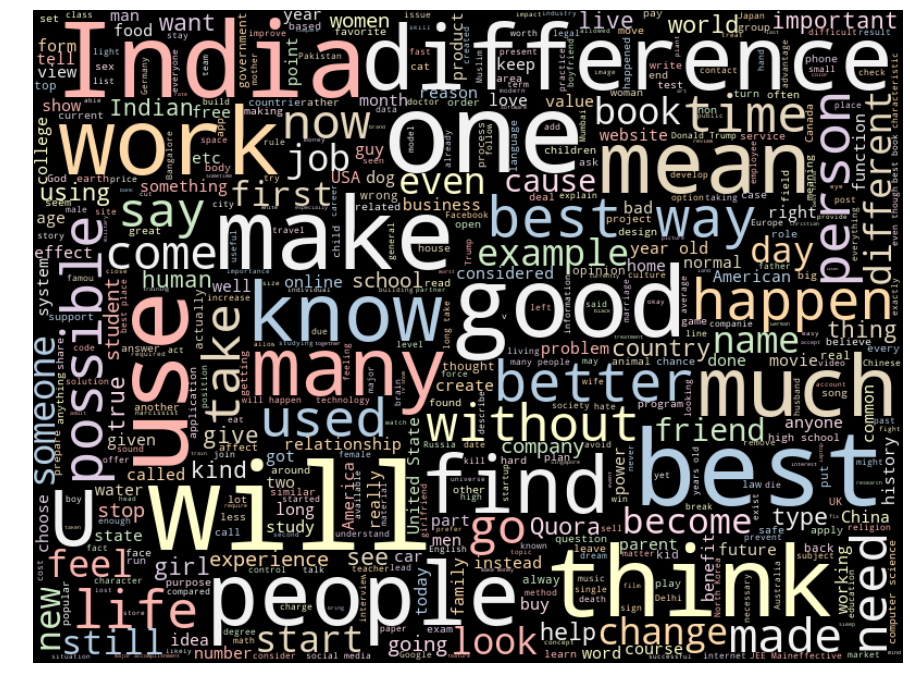

In [351]:
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap


wc = WordCloud(max_words=500, width=800, height=600, colormap=plt.get_cmap('Pastel1'),
                      random_state=21, max_font_size=110,  background_color=None)

freq_text = wc.process_text(text)

wc.generate_from_frequencies(freq_text)


plt.figure(figsize=(16, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [353]:
text = "".join(train_df.loc[train_df['target'] == 1]['question_text'].tolist())


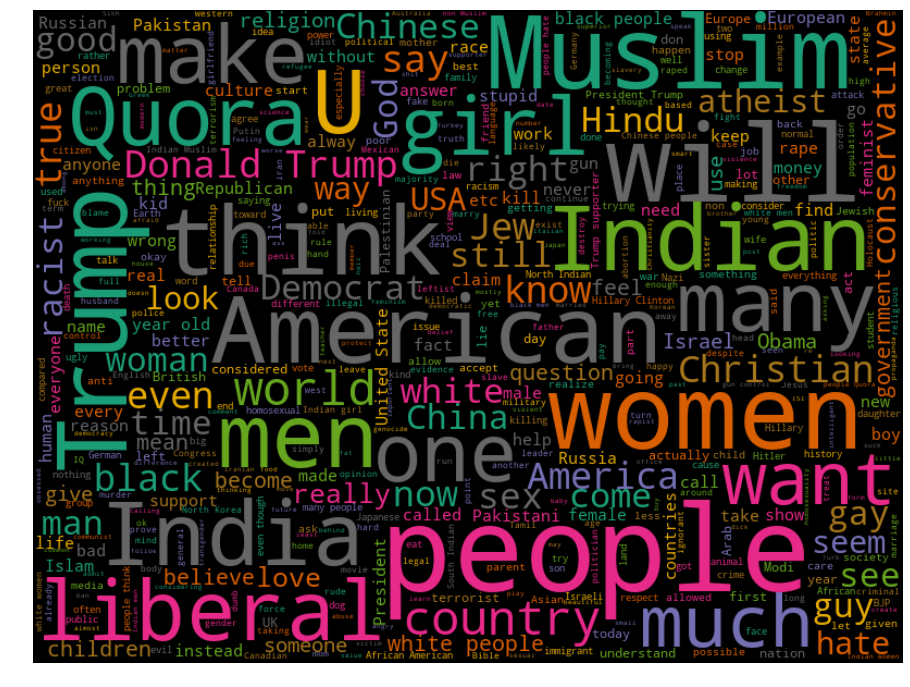

In [354]:
wc = WordCloud(max_words=500, width=800, height=600, colormap=plt.get_cmap('Dark2'),
                      random_state=21, max_font_size=110,  background_color=None)

freq_text = wc.process_text(text)

wc.generate_from_frequencies(freq_text)


plt.figure(figsize=(16, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Helpers

## Embedding helpers

In [300]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import os

def loadEmbeddings(path, dimensions, mode='r', encoding=None, errors=None):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    f = open(path, buffering=((2<<16) + 8), mode=mode, encoding=encoding, errors=errors)
    for line in f:
        if len(line) <= 100:
            continue
        values = line.split()
        word = ''.join(values[:-dimensions])
        coefs = np.asarray(values[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    f.close()
    print('Found %s word vectors.' % len(embeddings))
    return embeddings

In [301]:
def loadEmbeddingsGensim(path, dimensions, binary=True):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    gensim_vecs = KeyedVectors.load_word2vec_format(path, binary=binary)
    for word, vector in zip(gensim_vecs.vocab, gensim_vecs.vectors):
        coefs = np.asarray(vector[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    print('Found %s word vectors.' % len(embeddings))
    return embeddings

In [302]:
def getEmbeddingMatrix(embedding, word_index):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    
    nb_words = min(MAX_WORDS, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= MAX_WORDS:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

## Coverage helpers

In [303]:
from collections import Counter

def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = Counter()
    for sentence in sentences:
        for word in sentence:
            vocab[word] += 1
    return vocab

In [304]:
import operator

def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [296]:
X_train = train_df['question_text'].fillna('+++').tolist()
X_test = test_df['question_text'].fillna('+++').tolist()

y_train = train_df['target']

print('Found %s training questions.' % len(X_train))
print('Found %s test questions.' % len(X_test))

Found 1306122 training questions.
Found 56370 test questions.


In [297]:
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 300
MAX_WORDS = 100000

In [298]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, split=' ', filters='',
                       char_level=False, oov_token=None, document_count=0,
                      )
                                   
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Shape of X_train: (1306122, 250)
Shape of y_train: (1306122,)
Found 450689 unique tokens.


## Build vocabulary with counts

In [311]:
%%time

train_vocab = build_vocab(train_df['question_text'])
del train_df
test_vocab = build_vocab(test_df['question_text'])
del test_df

vocab = train_vocab + test_vocab
del train_vocab
del test_vocab

CPU times: user 13.4 s, sys: 40 ms, total: 13.5 s
Wall time: 13.5 s


In [312]:
%%time

import gc

print('glove:')
glove_path = '../input/embeddings/glove.840B.300d/glove.840B.300d.txt'
embeddings_index = loadEmbeddings(glove_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
gc.collect()
np.save('glove.npy', embedding_matrix)

glove:
Loading embeddings from: ../input/embeddings/glove.840B.300d/glove.840B.300d.txt
Found 2195892 word vectors.
Found embeddings for 32.91% of vocab
Found embeddings for  88.16% of all text


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


CPU times: user 2min 51s, sys: 6.92 s, total: 2min 58s
Wall time: 2min 58s


In [313]:
print('paragram:')
paragram_path = '../input/embeddings/paragram_300_sl999/paragram_300_sl999.txt'
embeddings_index = loadEmbeddings(paragram_path, EMBEDDING_DIM, encoding='utf8', errors='ignore')
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
gc.collect()
np.save('paragram.npy', embedding_matrix)

paragram:
Loading embeddings from: ../input/embeddings/paragram_300_sl999/paragram_300_sl999.txt
Found 1703663 word vectors.
Found embeddings for 19.42% of vocab
Found embeddings for  72.21% of all text


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [314]:
print('wiki:')
wiki_path = '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec'
embeddings_index = loadEmbeddings(wiki_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
gc.collect()
np.save('wiki.npy', embedding_matrix)

wiki:
Loading embeddings from: ../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
Found 999994 word vectors.
Found embeddings for 29.77% of vocab
Found embeddings for  87.66% of all text


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [315]:
print('google_news:')
google_news_path = '../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = loadEmbeddingsGensim(google_news_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
gc.collect()
np.save('google_news.npy', embedding_matrix)

google_news:
Loading embeddings from: ../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
Found 3000000 word vectors.
Found embeddings for 24.05% of vocab
Found embeddings for  78.75% of all text


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [316]:
del word_index
del vocab
gc.collect()

0